In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

# Making Plots Actually look nice

If one has SciencePlots (https://github.com/garrettj403/SciencePlots) installed has additional options for matplotlib

In [15]:
plt.style.use(['science', 'notebook', 'grid'])

## Quick Plotting
### Line Plots

Simple plotting commands to look at data quickly

In [23]:
x = np.linspace(0, 15, 30)
y = np.sin(x) + 0.1*np.random.randn(len(x))

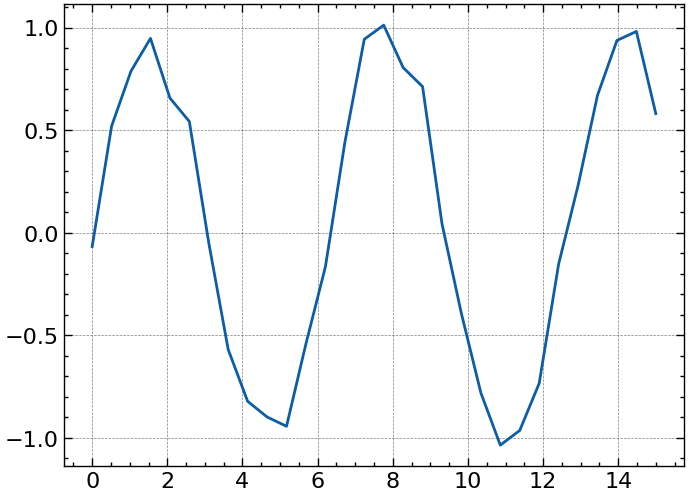

In [24]:
plt.plot(x, y)

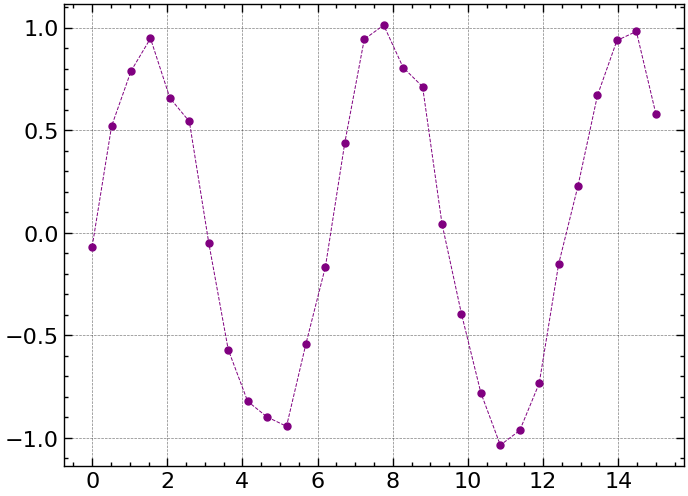

In [30]:
plt.plot(x, y, 'o--', color = 'purple', lw = 0.7, ms = 5)

Figure size

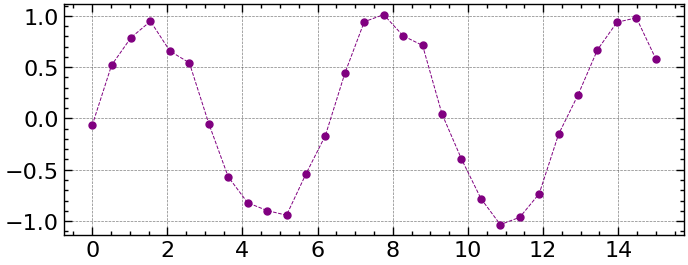

In [32]:
plt.figure(figsize = (8, 3))
plt.plot(x, y, 'o--', color = 'purple', lw = 0.7, ms = 5)

Axis labels

Text(0, 0.5, 'Voltage [V]')

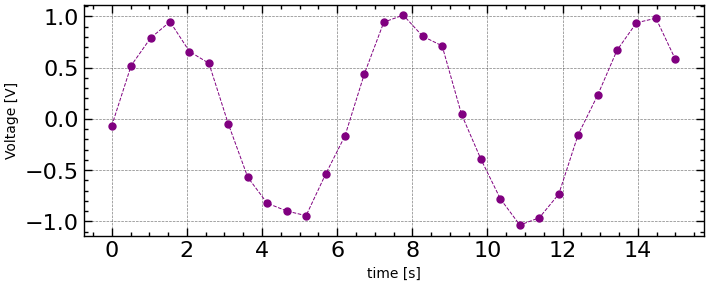

In [33]:
plt.figure(figsize = (8, 3))
plt.plot(x, y, 'o--', color = 'purple', lw = 0.7, ms = 5)
plt.xlabel('time [s]')
plt.ylabel('Voltage [V]')

Legend

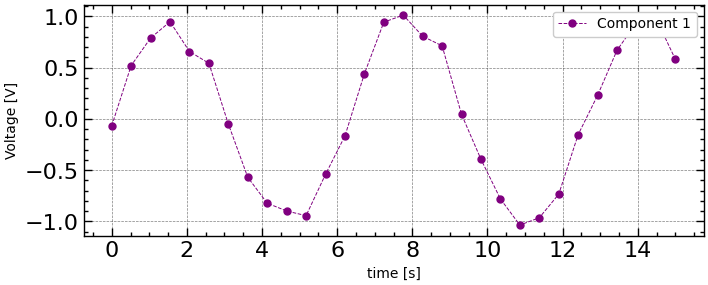

In [36]:
plt.figure(figsize = (8, 3))
plt.plot(x, y, 'o--', color = 'purple', lw = 0.7, ms = 5, label = 'Component 1')
plt.xlabel('time [s]')
plt.ylabel('Voltage [V]')
plt.legend(loc = 'upper right', fontsize = 10)

Easy to have multiple lines on same plot

In [38]:
x2 = np.linspace(0, 15, 100)
y2 = np.sin(x2)

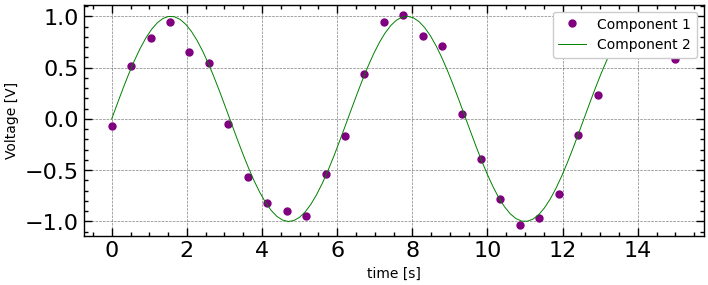

In [40]:
plt.figure(figsize = (8, 3))
plt.plot(x, y, 'o', color = 'purple', lw = 0.7, ms = 5, label = 'Component 1')
plt.plot(x2, y2, '-', color = 'green', lw = 0.7, ms = 5, label = 'Component 2')
plt.xlabel('time [s]')
plt.ylabel('Voltage [V]')
plt.legend(loc = 'upper right', fontsize = 10)

$x$ and $y$ limits

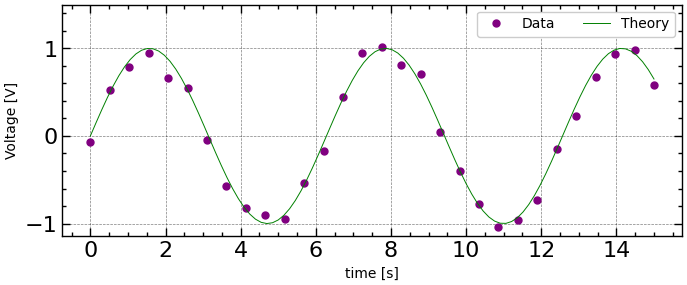

In [43]:
plt.figure(figsize = (8, 3))
plt.plot(x, y, 'o', color = 'purple', lw = 0.7, ms = 5, label = 'Data')
plt.plot(x2, y2, '-', color = 'green', lw = 0.7, ms = 5, label = 'Theory')
plt.xlabel('time [s]')
plt.ylabel('Voltage [V]')
plt.ylim(top = 1.5)
plt.legend(loc = 'upper right', fontsize = 10, ncol = 2)

### Histograms

In [44]:
res = np.random.randn(1000)*0.2 + 0.4

Quick Histogram

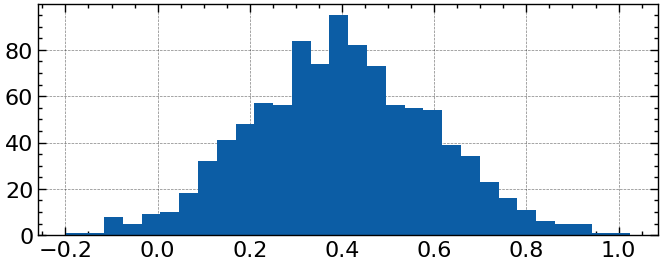

In [57]:
plt.figure(figsize = (8, 3))
a = plt.hist(res, bins = 30)

In [58]:
a

(array([ 1.,  1.,  8.,  5.,  9., 10., 18., 32., 41., 48., 57., 56., 84.,
        74., 95., 82., 73., 56., 55., 54., 39., 34., 23., 16., 11.,  6.,
         5.,  5.,  1.,  1.]),
 array([-0.19782242, -0.15706403, -0.11630564, -0.07554725, -0.03478885,
         0.00596954,  0.04672793,  0.08748633,  0.12824472,  0.16900311,
         0.20976151,  0.2505199 ,  0.29127829,  0.33203669,  0.37279508,
         0.41355347,  0.45431186,  0.49507026,  0.53582865,  0.57658704,
         0.61734544,  0.65810383,  0.69886222,  0.73962062,  0.78037901,
         0.8211374 ,  0.86189579,  0.90265419,  0.94341258,  0.98417097,
         1.02492937]),
 <BarContainer object of 30 artists>)

Density plot

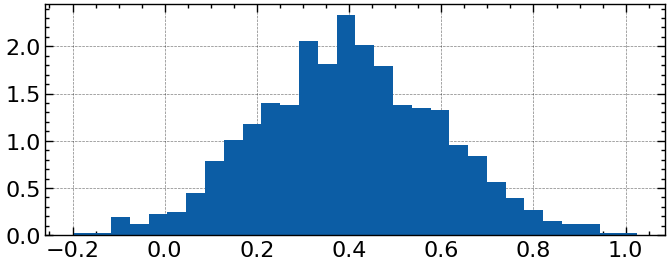

In [59]:
plt.figure(figsize = (8, 3))
a = plt.hist(res, bins = 30, density = True)

Different style of bins (useful for ploting multiple histograms)

In [67]:
res2 = np.random.randn(1000)*0.2 + 0.4

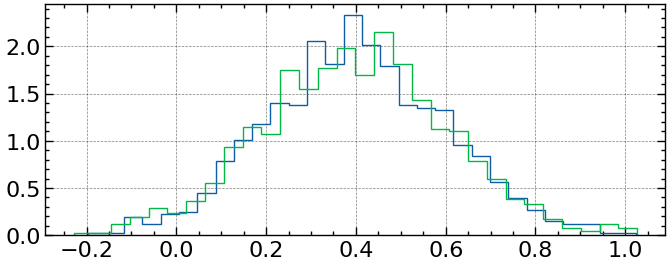

In [70]:
plt.figure(figsize=(8, 3))
plt.hist(res, bins = 30, density = True, histtype='step')
plt.hist(res2, bins = 30, density = True, histtype='step')
plt.show()

## A More Advanced API

For more complicated plots such as 

* Multiple subplots on 1 figure
* Conveniently adding text to plots
* Creating animations

one needs to use a slightly more advanced API

### Single Axes in one Figure

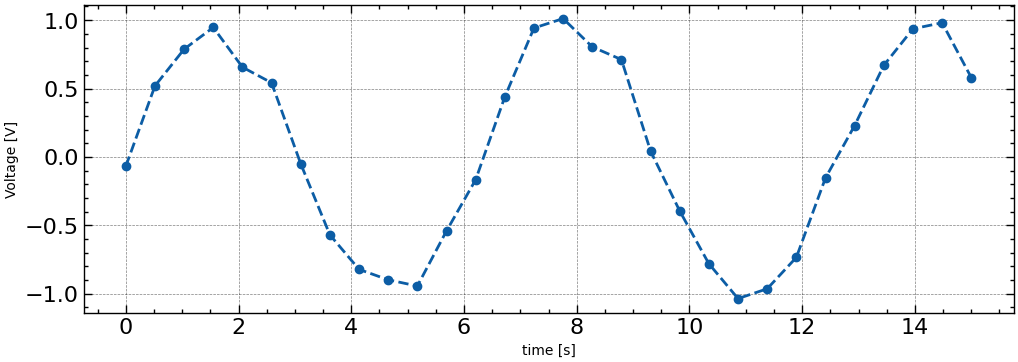

In [75]:
fig, ax = plt.subplots(1, 1, figsize = (12, 4))
ax.plot(x, y, 'o--')
ax.set_xlabel('time [s]')
ax.set_ylabel('Voltage [V]')
plt.show()

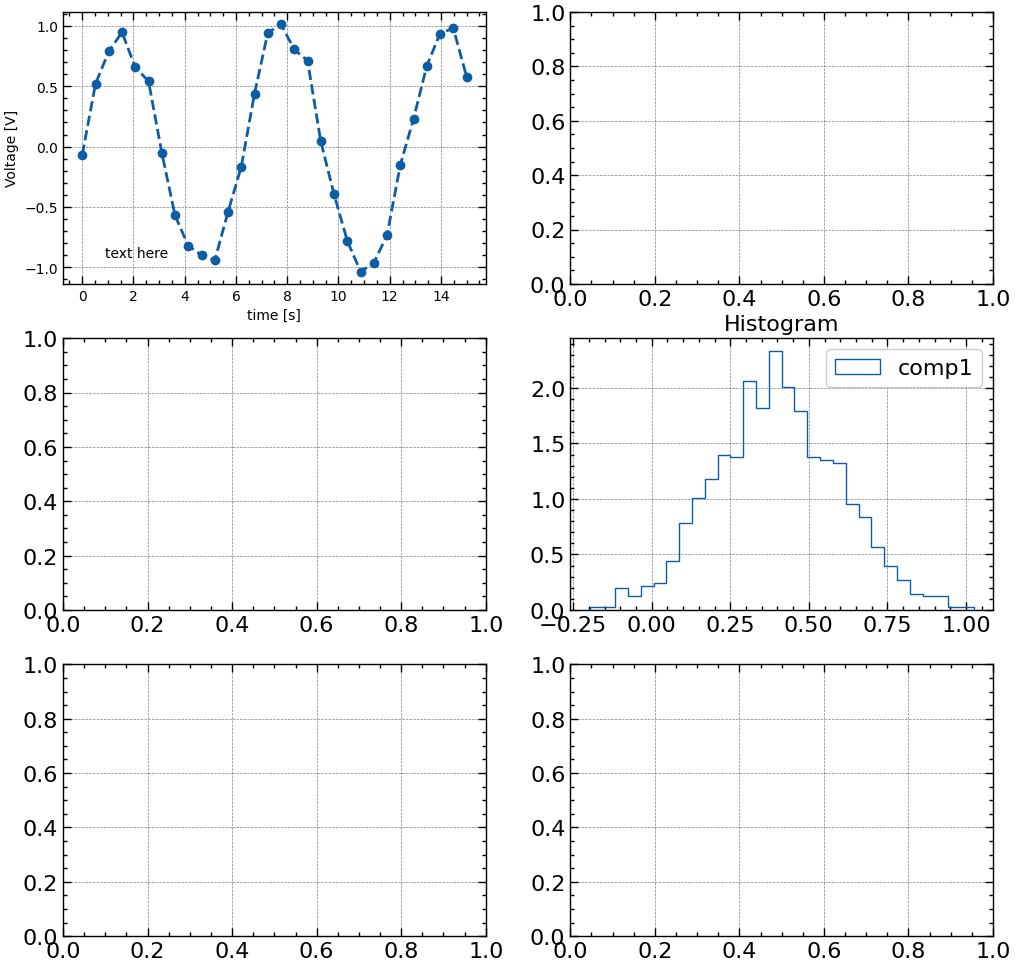

In [91]:
fig, axes = plt.subplots(3, 2, figsize = (12, 12))
ax = axes[0][0]
ax.plot(x, y, 'o--')
ax.set_xlabel('time [s]')
ax.set_ylabel('Voltage [V]')
ax.text(0.1, 0.1, 'text here', transform = ax.transAxes)
ax.tick_params(axis = 'both', labelsize = 10)
ax = axes[1][1]
ax.hist(res, bins = 30, density = True, histtype='step', label = 'comp1')
ax.legend()
ax.set_title('Histogram')
plt.show()

## Example

Creating the following plot

In [92]:
res_a1 = 0.2*np.random.randn(1000)+0.4
res_b1 = 0.25*np.random.randn(1000)+0.4
res_a2 = 0.21*np.random.randn(1000)+0.3
res_b2 = 0.22*np.random.randn(1000)+0.3

Good habit to come up with complicated strings beforehand

In [97]:
textstr1 = '\n'.join((
    r'$\sigma_a=%.4f$' % (np.std(res_a1)),
    r'$\sigma_b=%.4f$' % (np.std(res_b1))))

textstr2 = '\n'.join((
    r'$\sigma_a=%.4f$' % (np.std(res_a2)),
    r'$\sigma_b=%.4f$' % (np.std(res_b2))))

Make plot

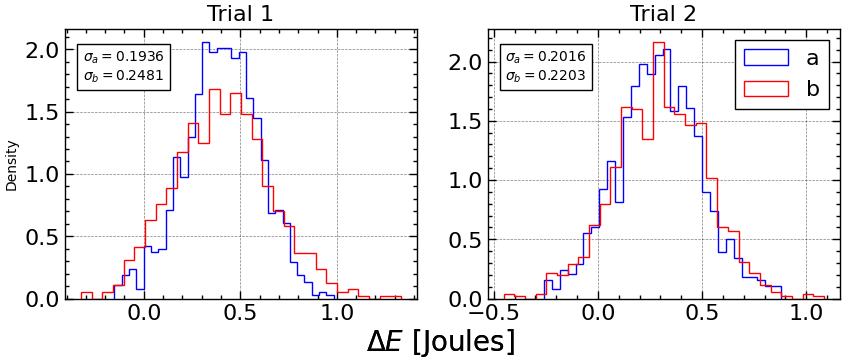

In [126]:
fig, axes = plt.subplots(1, 2, figsize = (10, 3.5))
ax = axes[0]
ax.hist(res_a1, bins = 30, density = True, histtype = 'step', label = 'a', color = 'blue')
ax.hist(res_b1, bins = 30, density = True, histtype = 'step', label = 'b', color = 'red')
ax.text(0.05, 0.81, textstr1, transform = ax.transAxes, bbox = dict(facecolor = 'white', edgecolor = 'black'))
ax.set_ylabel('Density')
ax.set_title('Trial 1')
fig.text(0.5, -0.04, '$\Delta E$ [Joules]', ha = 'center', fontsize = 20)
ax = axes[1]
ax.hist(res_a2, bins = 30, density = True, histtype = 'step', label = 'a', color = 'blue')
ax.hist(res_b2, bins = 30, density = True, histtype = 'step', label = 'b', color = 'red')
ax.legend(loc = 'upper right', fancybox = False, edgecolor = 'black')
ax.text(0.05, 0.81, textstr2, transform = ax.transAxes, bbox = dict(facecolor = 'white', edgecolor = 'black'))
ax.set_title('Trial 2')
fig.text(0.5, -0.04, '$\Delta E$ [Joules]', ha = 'center', fontsize = 20)
plt.show()

## 2D plots

Generate some data

In [128]:
_ = np.linspace(-1, 1, 100)
x, y = np.meshgrid(_, _)
z = x**2 + x*y

## Filled-in contour plots

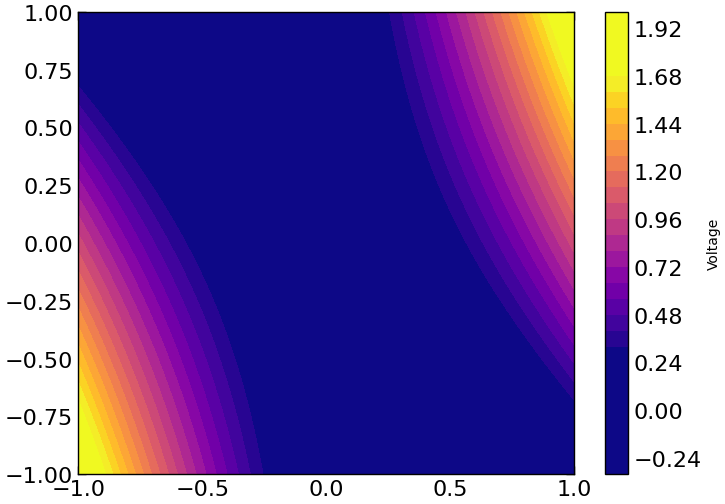

In [137]:
plt.contourf(x, y, z, levels = 30, vmin = 0.3, vmax = 1.68, cmap = 'plasma')
plt.colorbar(label = 'Voltage')

Can make them more dense ny changing levels and also can change colormap

* See https://matplotlib.org/stable/tutorials/colors/colormaps.html#sphx-glr-tutorials-colors-colormaps-py

Can use `vmin` and `vmax` to adjust the color range

* See https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html for all settings

## Contour plot

<a list of 28 text.Text objects>

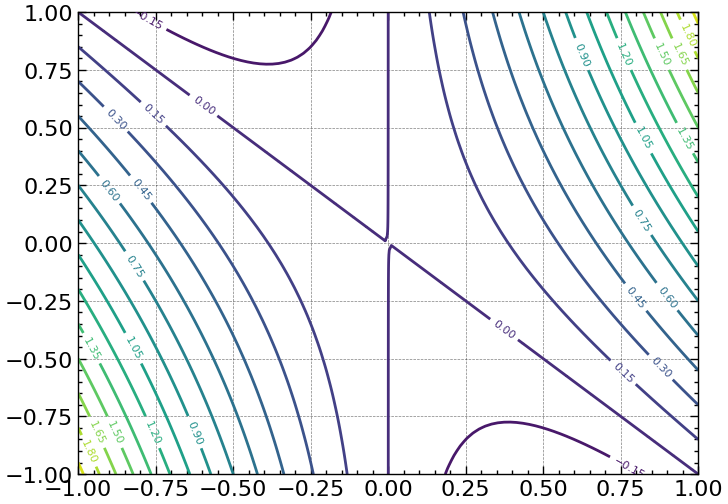

In [140]:
cs = plt.contour(x, y, z, levels = 20)
plt.clabel(cs, fontsize = 8)

## 3D Surface Plot

3D surface plots are generally not preferred, however they work well in animations.

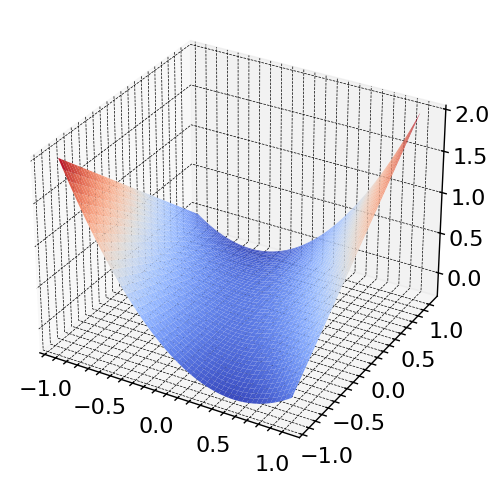

In [145]:
fig, ax = plt.subplots(subplot_kw = {'projection': '3d'})
ax.plot_surface(x, y, z, cmap = 'coolwarm')

## StreamPlots

For plotting vector fields

In [146]:
w = 3
_ = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(_, _)
U = -1 -X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U**2 + V**2)

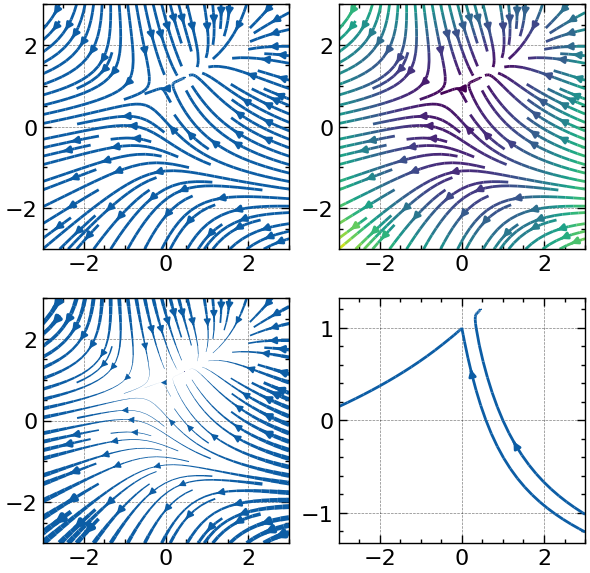

In [151]:
fig, axes = plt.subplots(2, 2, figsize = (7, 7))
ax = axes[0][0]
ax.streamplot(X, Y, U, V)
ax = axes[0][1]
ax.streamplot(X, Y, U, V, color = speed)
ax = axes[1][0]
lw = 5*speed / speed.max()
ax.streamplot(X, Y, U, V, linewidth = lw)
ax = axes[1][1]
seedpoints = np.array([[0, 1], [1, 0]])
ax.streamplot(X, Y, U, V, start_points = seedpoints)

## Image reading

In [156]:
im = plt.imread('../images/flower.png')

Plot image

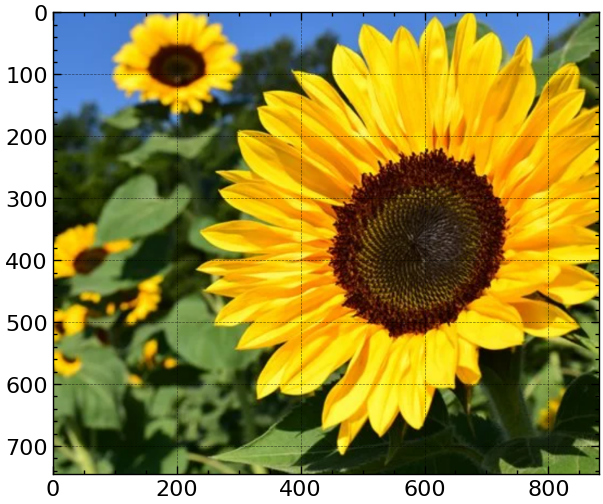

In [157]:
plt.imshow(im)

## Animations

Animations require relating the time of your problem to the frame of the animation, then specifying the frames per second

* Below is a  wave moving at 3m/s. Translate this into an animation

In [159]:
def f(x, t):
    return np.sin(x - 3*t)

x = np.linspace(0, 10*np.pi, 1000)

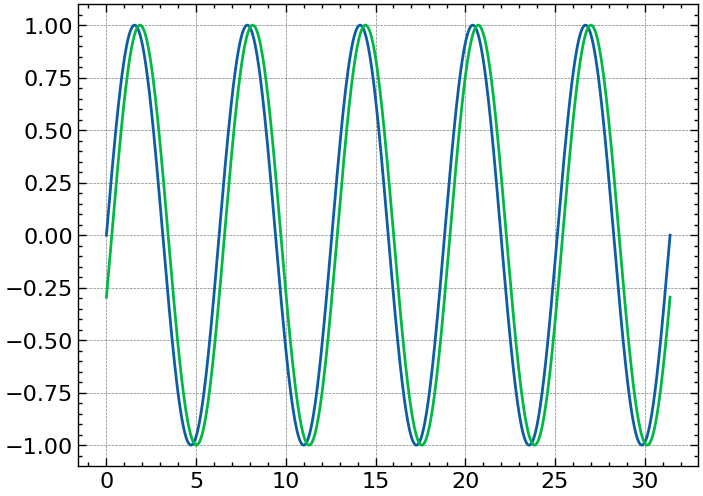

In [162]:
plt.plot(x, f(x, 0))
plt.plot(x, f(x, 0.1))

In [163]:
from matplotlib import animation
from matplotlib.animation import PillowWriter